In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [3]:
from matplotlib.colors import hsv_to_rgb

In [4]:

p_path="/Users/shobhitsharma/Downloads/Purple Patch Detction/Purple/"
n_path="/Users/shobhitsharma/Downloads/Purple Patch Detction/Non Purple/"

In [5]:
purples=os.listdir(p_path)
n_purples=os.listdir(n_path)

In [6]:
#st=set()

In [7]:
#os.listdir(path+"Non Purple")

# RGB mapping

In [8]:
im=cv2.cvtColor(cv2.imread(n_path+n_purples[3]),cv2.COLOR_BGR2RGB)
im=cv2.GaussianBlur(im,(5,5),0)

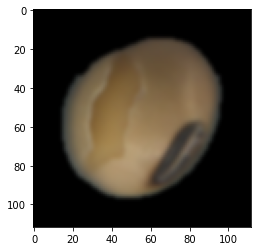

In [9]:
plt.imshow(im)
plt.show()

In [10]:
r, g, b = cv2.split(im)

%matplotlib inline
fig=plt.figure(figsize=(7,7))
fig.add_subplot(3,1,1)
plt.title("Red Channel")
plt.hist(r.ravel(),256,[0,256])
fig.add_subplot(3,1,2)
plt.title("Green Channel")
plt.hist(g.ravel(),256,[0,256])
fig.add_subplot(3,1,3)
plt.title("Blue Channel")
plt.hist(b.ravel(),256,[0,256])
plt.show()

%matplotlib notebook
fig=plt.figure(figsize=(7,7))
axis=fig.add_subplot(1,1,1, projection="3d")
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolor=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# HSV mapping

In [11]:
im=cv2.cvtColor(cv2.imread(p_path+purples[3]), cv2.COLOR_BGR2HSV)
#im=cv2.GaussianBlur(im,(5,5),0)

In [12]:
#cv2.imshow("pic",im)
#cv2.waitKey(0)

%matplotlib inline
fig=plt.figure(figsize=(5,5))
fig.add_subplot(1,2,1)
plt.title("Without HSV")
plt.imshow(cv2.cvtColor(im,cv2.COLOR_HSV2RGB))
fig.add_subplot(1,2,2)
plt.title("HSV")
plt.imshow(im)
plt.hsv()
plt.show()

In [13]:
h,s,v = cv2.split(im)

In [14]:
#np.unique(h,return_counts=True)#,np.unique(s,return_counts=True),np.unique(v,return_counts=True)

%matplotlib inline
plt.hist(im.ravel(),256,[0,256])
plt.show()

%matplotlib inline
fig=plt.figure(figsize=(16,16))
axis=fig.add_subplot(1,1,1, projection="3d")
pixel_colors = im.reshape((np.shape(im)[0]*np.shape(im)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

#### Mapping Ends

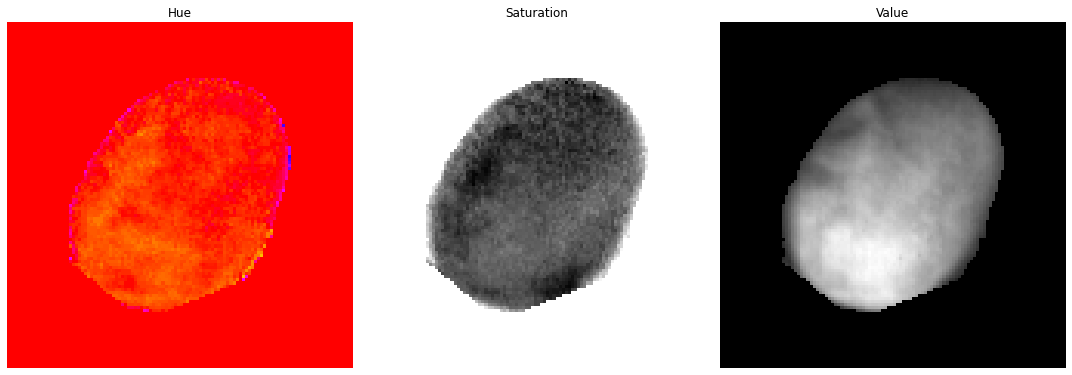

In [15]:
%matplotlib inline
fig,ax=plt.subplots(1,3, figsize=(15,7),sharey=True)
#fig=plt.figure(figsize=(7,7), sharey=True)
#fig.add_subplot(1,3,1)
ax[0].imshow(h, cmap='hsv')
ax[0].set_title("Hue")
ax[0].axis('off')
#fig.add_subplot(1,3,2)

ax[1].imshow(s, cmap='Greys')
ax[1].set_title("Saturation")
ax[1].axis('off')
#fig.add_subplot(1,3,3)

ax[2].imshow(v,cmap='gray')
ax[2].set_title("Value")
ax[2].axis('off')
fig.tight_layout()
plt.show()

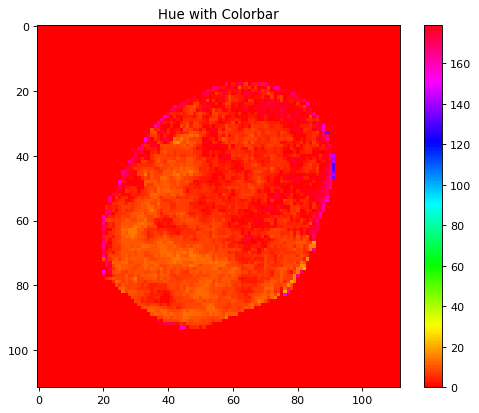

In [16]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title("Hue with Colorbar")
plt.imshow(h, cmap='hsv')
plt.colorbar()
plt.show()

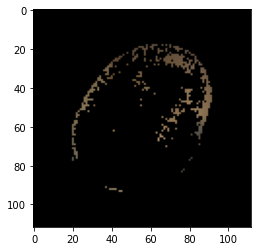

In [17]:
l_mask=h>130
h_mask=h<200
mask=h_mask*l_mask
red=r*mask
green=g*mask
blue=b*mask
temp=np.dstack((red,green,blue))
plt.imshow(temp)
plt.show()

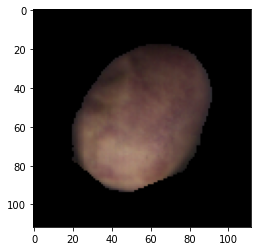

In [18]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_HSV2RGB))
plt.show()

In [19]:
def plot_f(h,s,v):
    %matplotlib inline
    fig,ax=plt.subplots(1,3, figsize=(15,7),sharey=True)
    #fig=plt.figure(figsize=(7,7), sharey=True)
    #fig.add_subplot(1,3,1)
    ax[0].imshow(h, cmap='hsv')
    ax[0].set_title("Hue")
    ax[0].axis('off')
    #fig.add_subplot(1,3,2)

    ax[1].imshow(s, cmap='Greys')
    ax[1].set_title("Saturation")
    ax[1].axis('off')
    #fig.add_subplot(1,3,3)

    ax[2].imshow(v,cmap='gray')
    ax[2].set_title("Value")
    ax[2].axis('off')
    fig.tight_layout()
    plot_colorbar(h)
    plt.show()

In [20]:
def plot_colorbar(h):
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    plt.title("Hue with Colorbar")
    plt.imshow(h, cmap='hsv')
    plt.colorbar()

plot_f(h,s,v)

In [21]:
def masking(r,g,b,h):
    l_mask=h>130
    h_mask=h<200
    mask=h_mask*l_mask
    red=r*mask
    green=g*mask
    blue=b*mask
    temp=np.dstack((red,green,blue))
    #plt.imshow(temp)
    #plt.show
    return temp

temp = masking(r,g,b,h)

np.unique(temp,return_counts=True)

In [22]:
def check(temp):
    count1=0
    for k in range(temp.shape[2]):
        for i in range(temp.shape[0]):
            for j in range(temp.shape[1]):
                if(temp[i,j,k] != 0):
                    count1=count1+1
    if(count1>50):
        return 1
    else:
        return 0

In [23]:
def fun(path,name):
    im=cv2.cvtColor(cv2.imread(path+name),cv2.COLOR_BGR2RGB)
    #im=cv2.GaussianBlur(im,(11,11),0)
    r, g, b = cv2.split(im)
    im=cv2.cvtColor(cv2.imread(path+name), cv2.COLOR_BGR2HSV)
    #im=cv2.GaussianBlur(im,(11,11),0)
    h,s,v = cv2.split(im)
    #plot_f(h,s,v)
    temp = masking(r,g,b,h)
    #plt.imshow(temp)
    #plt.imshow(cv2.cvtColor(im,cv2.COLOR_HSV2RGB))
    #plt.show()
    return (check(temp))

In [24]:
for i in purples:
    flag=fun(p_path,i)
    if(flag==0):
        print("non-diseased")
    else:
        print("Diseased")

Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased
Diseased


In [25]:
for i in n_purples:
    flag=fun(n_path,i)
    if(flag==0):
        print("non-diseased")
    else:
        print("Diseased")

Diseased
non-diseased
Diseased
non-diseased
non-diseased
Diseased
non-diseased
non-diseased
non-diseased
non-diseased
non-diseased
Diseased
non-diseased
non-diseased
non-diseased
non-diseased
non-diseased
non-diseased
